<a href="https://colab.research.google.com/github/MikelCerio/BBK-KUTXABANK/blob/main/Generador_Transacciones_mikerl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GENERAR USUARIOS

# Nueva sección

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Voy a importar un fichero de Excel con datos del INE: nombres, apellidos, distribución por edades y distribución por sexos.
El esquema que seguirá la generación de usuarios será el siguiente:

1. Establecer el tamaño de la muestra (n).
2. Para el tamaño de muestra establecido, asignar a cada usuario una edad basada en la distribución que sigue la población real.

        Hacer lo mismo para los sexos (H/M)

3. Una vez tengo los n usuarios y tienen una edad y un sexo asignados, asignar también:

    3.1. Nombre (Diferenciando si es hombre o mujer)

    3.2. Apellidos

    3.3. Sueldo. Seguirá la distribución normal del sueldo (con datos reales). Estará ponderado por la edad, entendiendo que la experiencia tiene un peso relevante a la hora de determinar el sueldo.
    
    Posibilidad de cambiar el sueldo de -5% a 20% anual. Lo más probable entre 0 y 5%.

            3.3.1. Dinero en el banco. Dependiendo del sueldo y la edad

            3.3.2. Segundo trabajo. Será una posibilidad para las rentas bajas. Será un porcentaje de su primer sueldo, habrá límite.

    3.4. Alquiler / Casa. Dependiendo de la edad y el sueldo, se asignará al individuo la probabilidad de tener una casa o vivir de alquiler.

    3.5. Coche. Dependiendo

    3.6. IBAN (Kutxabank). Será el identificador de cada usuario

In [14]:
from google.colab import files
uploaded = files.upload()

Saving Apellidos.xlsx to Apellidos (1).xlsx
Saving Nombres_Edades.xlsx to Nombres_Edades (1).xlsx


In [15]:
!pip install faker

In [16]:
import numpy as np
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

In [17]:
# Configuración inicial
fake = Faker('es_ES')

### 0. Preparar los datos para poder usarlos en Faker

In [18]:
nombres_hombres = pd.read_excel(r'Nombres_Edades.xlsx', sheet_name='Hombres')
nombres_mujeres = pd.read_excel(r'Nombres_Edades.xlsx', sheet_name='Mujeres')
distribucion_edades = pd.read_excel(r'Nombres_Edades.xlsx', sheet_name='Distribucion_Edades')
distribucion_sexo = pd.read_excel(r'Nombres_Edades.xlsx', sheet_name='Distribucion_Sexo')
apellidos = pd.read_excel(r'Apellidos.xlsx', sheet_name='Apellidos')

In [19]:
nombres_hombres

,Rango_Edad,Nombre_Hombre,Total_Nombre_Hombre,Porcentaje_Nombre_Hombre
0,75 - 84,JOSE LUIS,1155,0.050187
1,75 - 84,JOSE MARIA,1070,0.046493
2,75 - 84,FRANCISCO JAVIER,1001,0.043495
3,75 - 84,JOSE ANTONIO,935,0.040627
4,75 - 84,JOSE IGNACIO,641,0.027853
...,...,...,...,...
3826,15 - 24,PELAYO,5,0.000109
3827,15 - 24,SAID,5,0.000109
3828,15 - 24,UHAITZ,5,0.000109
3829,15 - 24,VICENTE,5,0.000109


In [20]:
nombres_mujeres

,Rango_Edad,Nombre_Mujer,Total_Nombre_Mujer,Porcentaje_Nombre_Mujer
0,75 - 84,MARIA CARMEN,2443,0.080790
1,75 - 84,MARIA BEGOÑA,2056,0.067992
2,75 - 84,MARIA TERESA,1495,0.049439
3,75 - 84,MARIA ANGELES,1351,0.044677
4,75 - 84,MARIA PILAR,1149,0.037997
...,...,...,...,...
4391,15 - 24,YANIRE,5,0.000117
4392,15 - 24,YASMINE,5,0.000117
4393,15 - 24,ZEIANE,5,0.000117
4394,15 - 24,ZIARA,5,0.000117


In [21]:
distribucion_edades

,Rango_Edades,Numero_Hombres,Numero_Mujeres,Porcentaje_Personas_Grupo_Edad
0,15 - 24,55022,51200,0.111178
1,25 - 34,55136,54437,0.114685
2,35 - 44,78601,77381,0.163260
3,45 - 54,93430,93592,0.195748
4,55 - 64,84497,90548,0.183212
5,65 - 74,61730,71531,0.139479
6,75 - 84,36701,51617,0.092439


In [22]:
distribucion_sexo

,Rango_Edades,Numero_Hombres,Numero_Mujeres,Porcentaje_Hombres,Porcentaje_Mujeres
0,15 - 24,55022,51200,0.517991,0.482009
1,25 - 34,55136,54437,0.503190,0.496810
2,35 - 44,78601,77381,0.503911,0.496089
3,45 - 54,93430,93592,0.499567,0.500433
4,55 - 64,84497,90548,0.482716,0.517284
5,65 - 74,61730,71531,0.463226,0.536774
6,75 - 84,36701,51617,0.415555,0.584445


In [23]:
apellidos = apellidos.drop(columns='Unnamed: 0')
primer_apellido = apellidos['Primer_Apellido'].dropna()
segundo_apellido = apellidos['Segundo_Apellido'].dropna()
prob_primer_apellido = apellidos['Porcentaje_Primer_Apellido'].dropna()
prob_segundo_apellido = apellidos['Porcentaje_Segundo_Apellido'].dropna()
apellidos

,Primer_Apellido,Total_Primer_Apellido,Porcentaje_Primer_Apellido,Segundo_Apellido,Total_Segundo_Apellido,Porcentaje_Segundo_Apellido
0,GARCIA,29566,0.030499,GARCIA,30751,0.032346
1,GONZALEZ,22451,0.023159,GONZALEZ,23451,0.024668
2,FERNANDEZ,22283,0.022986,FERNANDEZ,23346,0.024557
3,RODRIGUEZ,17610,0.018166,RODRIGUEZ,18518,0.019479
4,LOPEZ,17505,0.018057,LOPEZ,18314,0.019264
...,...,...,...,...,...,...
4995,OTAEGUI,28,0.000029,NaN,NaN,NaN
4996,TOLA,28,0.000029,NaN,NaN,NaN
4997,IBARGARAY,28,0.000029,NaN,NaN,NaN
4998,AJENJO,28,0.000029,NaN,NaN,NaN


In [24]:
# Inicializar el diccionario de nombres por rango y sexo
nombres_edad_sexo = {}

# Definir los rangos de edad
rangos_edad = distribucion_edades['Rango_Edades'].tolist()

AÑADIR SUSCRIPCIONES A LAS CARACTERÍSTICAS DE CADA GRUPO + VACACIONES

In [25]:
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)

def generar_sueldo(grupo, grupos_caracteristicas):
    return round(np.random.uniform(*grupos_caracteristicas[grupo]['caracteristicas']['rango_sueldo']), 2)

def calcular_dinero_banco(sueldo):
    return round(np.random.uniform(sueldo * 3, sueldo * 12), 2)

def generar_edad(rango_edad):
    return random.randint(*rango_edad)

def generar_hijos(grupo, grupos_caracteristicas):
    min_hijos, max_hijos = grupos_caracteristicas[grupo]['caracteristicas']['rango_hijos']
    return random.randint(min_hijos, max_hijos)

def generar_sexo(edad, distribucion_sexo, rangos_edad):
    rango = next((r for r in rangos_edad if int(r.split(' - ')[0]) <= edad <= int(r.split(' - ')[1])), "85+")
    dist = distribucion_sexo[distribucion_sexo['Rango_Edades'] == rango].iloc[0]
    return np.random.choice(['H', 'M'], p=[dist['Porcentaje_Hombres'], dist['Porcentaje_Mujeres']])

def generar_nombre(edad, sexo, nombres_hombres, nombres_mujeres, rangos_edad):
    rango = next((r for r in rangos_edad if int(r.split(' - ')[0]) <= edad <= int(r.split(' - ')[1])), "85+")
    nombres = nombres_hombres if sexo == 'H' else nombres_mujeres
    nombres_filtrados = nombres[nombres['Rango_Edad'] == rango]
    return np.random.choice(
        nombres_filtrados[f'Nombre_{"Hombre" if sexo == "H" else "Mujer"}'].values,
        p=nombres_filtrados[f'Porcentaje_Nombre_{"Hombre" if sexo == "H" else "Mujer"}'].values
    )

def generar_apellidos(apellidos_df):
    primer_apellido_probs = apellidos_df['Porcentaje_Primer_Apellido'].fillna(0)
    primer_apellido_probs /= primer_apellido_probs.sum()
    segundo_apellido_probs = apellidos_df['Porcentaje_Segundo_Apellido'].fillna(0)
    segundo_apellido_probs /= segundo_apellido_probs.sum()

    primer_apellido = np.random.choice(apellidos_df['Primer_Apellido'], p=primer_apellido_probs)
    segundo_apellido = np.random.choice(apellidos_df['Segundo_Apellido'], p=segundo_apellido_probs)

    return f"{primer_apellido} {segundo_apellido}"

def generar_iban_kutxabank():
    entidad = "2095"
    oficina = f"{random.randint(0, 9999):04d}"
    dc = f"{random.randint(0, 99):02d}"
    cuenta = f"{random.randint(0, 9999999999):010d}"
    return f"ES95{entidad}{oficina}{dc}{cuenta}"

def generar_usuario(grupo, caracteristicas, rango_edad, distribucion_sexo, nombres_hombres, nombres_mujeres, rangos_edad, apellidos):
    edad = generar_edad(rango_edad)
    sexo = generar_sexo(edad, distribucion_sexo, rangos_edad)
    sueldo = generar_sueldo(grupo, caracteristicas)

    usuario = {
        'grupo': grupo,
        'edad': edad,
        'sexo': sexo,
        'sueldo': sueldo,
        'dinero_banco': calcular_dinero_banco(sueldo),
        'hijos': generar_hijos(grupo, caracteristicas),
        'vivienda': np.random.choice(['Propiedad', 'Alquiler'], p=[caracteristicas['caracteristicas']['prob_casa'], 1 - caracteristicas['caracteristicas']['prob_casa']]),
        'coche': random.random() < caracteristicas['caracteristicas']['prob_coche'],
        'nombre': generar_nombre(edad, sexo, nombres_hombres, nombres_mujeres, rangos_edad),
        'apellidos': generar_apellidos(apellidos),
        'iban': generar_iban_kutxabank()
    }

    if usuario['vivienda'] == 'Alquiler':
        usuario['gasto_alquiler'] = min(
            np.round(random.uniform(400, 1000), 2),
            np.round(usuario['sueldo'] * 0.4, 2)
        )
    else:
        usuario['gasto_hipoteca'] = min(
            np.round(random.uniform(500, 1200), 2),
            np.round(usuario['sueldo'] * 0.35, 2)
        )

    usuario['gasto_internet'] = round(random.randrange(2000, 7050, 50) / 100, 2)
    usuario['gasto_movil'] = round(random.randrange(1500, 6050, 50) / 100, 2)
    usuario['gasto_ibi'] = round(random.uniform(200, 700), 2) if usuario['vivienda'] == 'Propiedad' else 0

    return usuario

def generar_usuarios_avanzados(n, grupos_caracteristicas, probabilidades_grupos, rango_edad, distribucion_sexo, nombres_hombres, nombres_mujeres, rangos_edad, apellidos, seed=None):
    if seed is not None:
        set_seed(seed)

    usuarios = []
    ibans_generados = set()

    for _ in range(n):
        grupo = asignar_grupo(probabilidades_grupos)
        if grupo == 'Grupo 1':
            usuario = generar_usuario_grupo_1()
        elif grupo == 'Grupo 2':
            usuario = generar_usuario_grupo_2()
        elif grupo == 'Grupo 3':
            usuario = generar_usuario_grupo_3()
        elif grupo == 'Grupo 4':
            usuario = generar_usuario_grupo_4()
        else:
            raise ValueError(f"Grupo no reconocido: {grupo}")

        usuario['nombre'] = generar_nombre(usuario['edad'], usuario['sexo'], nombres_hombres, nombres_mujeres, rangos_edad)
        usuario['apellidos'] = generar_apellidos(apellidos)
        usuario['iban'] = generar_iban_kutxabank()

        while usuario['iban'] in ibans_generados:
            usuario['iban'] = generar_iban_kutxabank()
        ibans_generados.add(usuario['iban'])

        # Generar suscripciones para el usuario
        usuario['suscripciones'] = generar_suscripciones(grupo, grupos_caracteristicas, usuario['hijos'])

        usuarios.append(usuario)

    return pd.DataFrame(usuarios)

# POSIBLE BORRAR

In [26]:
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)

def generar_sueldo(grupo, caracteristicas):
    return round(np.random.uniform(*caracteristicas['caracteristicas']['rango_sueldo']), 2)

def calcular_dinero_banco(sueldo):
    return round(np.random.uniform(sueldo * 3, sueldo * 12), 2)

def asignar_grupo(probabilidades_grupos):
    return np.random.choice(list(probabilidades_grupos.keys()), p=list(probabilidades_grupos.values()))

def generar_iban_kutxabank():
    entidad = "2095"
    oficina = f"{random.randint(0, 9999):04d}"
    dc = f"{random.randint(0, 99):02d}"
    cuenta = f"{random.randint(0, 9999999999):010d}"
    return f"ES95{entidad}{oficina}{dc}{cuenta}"

def generar_edad(rango_edad):
    return random.randint(rango_edad[0], rango_edad[1])

def generar_hijos(grupo, caracteristicas):
    min_hijos, max_hijos = caracteristicas['caracteristicas']['rango_hijos']
    return random.randint(min_hijos, max_hijos)

def determinar_rango_edad(edad, rangos_edad):
    for rango in rangos_edad:
        min_edad, max_edad = map(int, rango.split(' - '))
        if min_edad <= edad <= max_edad:
            return rango
    return "85+"

def generar_sexo(edad, distribucion_sexo, rangos_edad):
    rango = determinar_rango_edad(edad, rangos_edad)
    dist = distribucion_sexo[distribucion_sexo['Rango_Edades'] == rango].iloc[0]
    return np.random.choice(['H', 'M'], p=[dist['Porcentaje_Hombres'], dist['Porcentaje_Mujeres']])

def generar_nombre(edad, sexo, nombres_hombres, nombres_mujeres, rangos_edad):
    rango = determinar_rango_edad(edad, rangos_edad)
    nombres = nombres_hombres if sexo == 'H' else nombres_mujeres
    nombres_filtrados = nombres[nombres['Rango_Edad'] == rango]
    return np.random.choice(
        nombres_filtrados[f'Nombre_{"Hombre" if sexo == "H" else "Mujer"}'].values,
        p=nombres_filtrados[f'Porcentaje_Nombre_{"Hombre" if sexo == "H" else "Mujer"}'].values
    )

def generar_apellidos(apellidos_df):
    primer_apellido_probs = apellidos_df['Porcentaje_Primer_Apellido'].fillna(0)
    primer_apellido_probs /= primer_apellido_probs.sum()
    segundo_apellido_probs = apellidos_df['Porcentaje_Segundo_Apellido'].fillna(0)
    segundo_apellido_probs /= segundo_apellido_probs.sum()

    primer_apellido = np.random.choice(apellidos_df['Primer_Apellido'], p=primer_apellido_probs)
    segundo_apellido = np.random.choice(apellidos_df['Segundo_Apellido'], p=segundo_apellido_probs)

    return f"{primer_apellido} {segundo_apellido}"

def generar_suscripciones(grupo, caracteristicas, hijos):
    suscripciones = {}
    for suscripcion, prob in caracteristicas['transacciones']['suscripciones'].items():
        if suscripcion == 'disney_plus':
            prob_disney = prob['probabilidad']
            if 'condicion' in prob and eval(prob['condicion'], {'hijos': hijos}):
                prob_disney *= 1.5  # Incremento si hay hijos
            suscripciones[suscripcion] = random.random() < prob_disney
        else:
            suscripciones[suscripcion] = random.random() < prob['probabilidad']

    return suscripciones

def generar_usuarios_avanzados(n, grupos_caracteristicas, probabilidades_grupos, rango_edad, distribucion_sexo, nombres_hombres, nombres_mujeres, rangos_edad, apellidos, seed=None):
    if seed is not None:
        set_seed(seed)

    usuarios = []
    ibans_generados = set()

    for _ in range(n):
        grupo = asignar_grupo(probabilidades_grupos)
        usuario = generar_usuario(grupo, grupos_caracteristicas[grupo], rango_edad, distribucion_sexo, nombres_hombres, nombres_mujeres, rangos_edad, apellidos)

        while usuario['iban'] in ibans_generados:
            usuario['iban'] = generar_iban_kutxabank()
        ibans_generados.add(usuario['iban'])

        usuarios.append(usuario)

    return pd.DataFrame(usuarios)

In [27]:
grupo_1 = {
    'caracteristicas': {
        'rango_sueldo': (3400, 6400),
        'rango_hijos': (1, 3),
        'rango_mensualidades': (6, 14),
        'prob_casa': 0.9,
        'prob_coche': 1.0,
    },
    'transacciones': {
        'gastos_recurrentes': {
            'internet': {'probabilidad': 1.0},
            'movil': {'probabilidad': 1.0},
            'luz': {'probabilidad': 1.0},
            'gas': {'probabilidad': 1.0},
            'seguro_casa': {'probabilidad': 1.0, 'condicion': 'vivienda == "Propiedad"'},
            'ibi': {'probabilidad': 1.0, 'condicion': 'vivienda == "Propiedad"'},
        },
        'suscripciones': {
            'amazon_prime': {'probabilidad': 0.8},
            'netflix': {'probabilidad': 0.9},
            'hbo': {'probabilidad': 0.5},
            'disney_plus': {'probabilidad': 0.9, 'condicion': 'hijos > 0'},
            'spotify': {'probabilidad': 0.7},
        },
        'ocio': {
            'cafe': {'probabilidad': 0.6},
            'comida_fuera': {'probabilidad': 0.3},
            'cine': {'probabilidad': 0.2},
            'gimnasio': {'probabilidad': 0.4},
        },
        'transporte': {
            'transporte_publico': {'probabilidad': 0.3},
            'gasolina': {'probabilidad': 1.0},
        },
        'supermercado': {
            'compra_semanal': {'probabilidad': 1.0},
        },
        'extras': {
            'gastos_hijos': {
                'tipo': 'fijo',
                'rango': (100, 300),
                'frecuencia': 'mensual',
                'probabilidad': 1.0,
                'por_hijo': True
            },
            'actividades_extraescolares': {
                'tipo': 'fijo',
                'importe': 50,
                'frecuencia': 'mensual',
                'probabilidad': 0.8,
                'por_hijo': True
            },
        },
    }
}

In [28]:
grupo_2 = {
    'caracteristicas': {
        'rango_sueldo': (1600, 2200),
        'rango_hijos': (0, 1),
        'rango_mensualidades': (2, 6),
        'prob_casa': 0.1,
        'prob_coche': 0.6,
    },
    'transacciones': {
        'gastos_recurrentes': {
            'internet': {'probabilidad': 1.0},
            'movil': {'probabilidad': 1.0},
            'luz': {'probabilidad': 1.0},
            'gas': {'probabilidad': 0.8},
            'seguro_casa': {'probabilidad': 1.0, 'condicion': 'vivienda == "Propiedad"'},
            'ibi': {'probabilidad': 1.0, 'condicion': 'vivienda == "Propiedad"'},
        },
        'suscripciones': {
            'amazon_prime': {'probabilidad': 0.7},
            'netflix': {'probabilidad': 0.8},
            'hbo': {'probabilidad': 0.6},
            'disney_plus': {'probabilidad': 0.3, 'condicion': 'hijos > 0'},
            'spotify': {'probabilidad': 0.9},
        },
        'ocio': {
            'cafe': {'probabilidad': 0.9},
            'comida_fuera': {'probabilidad': 0.8},
            'cine': {'probabilidad': 0.7},
            'gimnasio': {'probabilidad': 0.6},
        },
        'transporte': {
            'transporte_publico': {'probabilidad': 0.7},
            'gasolina': {'probabilidad': 0.6},
        },
        'supermercado': {
            'compra_semanal': {'probabilidad': 0.9},
        },
        'extras': {
            'salidas_nocturnas': {'tipo': 'fijo', 'rango': (50, 150), 'frecuencia': 'semanal', 'probabilidad': 0.8},
            'viajes_cortos': {'tipo': 'fijo', 'rango': (200, 500), 'frecuencia': 'trimestral', 'probabilidad': 0.6},
            'gastos_hijos': {
                'tipo': 'fijo',
                'rango': (100, 300),
                'frecuencia': 'mensual',
                'probabilidad': 1.0,
                'condicion': 'hijos > 0',
                'por_hijo': True
            },
        },
    }
}

In [29]:
grupo_3 = {
    'caracteristicas': {
        'rango_sueldo': (1600, 2400),
        'rango_hijos': (0, 1),
        'rango_mensualidades': ((4, 6), (12, 20)),  # (con casa, sin casa)
        'prob_casa': 0.65,
        'prob_coche': 0.3,
    },
    'transacciones': {
        'gastos_recurrentes': {
            'internet': {'probabilidad': 1.0},
            'movil': {'probabilidad': 1.0},
            'luz': {'probabilidad': 1.0},
            'gas': {'probabilidad': 0.9},
            'seguro_casa': {'probabilidad': 1.0, 'condicion': 'vivienda == "Propiedad"'},
            'ibi': {'probabilidad': 1.0, 'condicion': 'vivienda == "Propiedad"'},
        },
        'suscripciones': {
            'amazon_prime': {'probabilidad': 0.6},
            'netflix': {'probabilidad': 0.7},
            'hbo': {'probabilidad': 0.4},
            'disney_plus': {'probabilidad': 0.2, 'condicion': 'hijos > 0'},
            'spotify': {'probabilidad': 0.8},
        },
        'ocio': {
            'cafe': {'probabilidad': 0.7},
            'comida_fuera': {'probabilidad': 0.5},
            'cine': {'probabilidad': 0.5},
            'gimnasio': {'probabilidad': 0.5},
        },
        'transporte': {
            'transporte_publico': {'probabilidad': 0.8},
            'gasolina': {'probabilidad': 0.3},
        },
        'supermercado': {
            'compra_semanal': {'probabilidad': 1.0},
        },
        'extras': {
            'ahorro': {'tipo': 'porcentaje', 'porcentaje': 0.2, 'frecuencia': 'mensual', 'probabilidad': 0.8},
            'mejoras_hogar': {'tipo': 'fijo', 'rango': (100, 500), 'frecuencia': 'trimestral', 'probabilidad': 0.6, 'condicion': 'vivienda == "Propiedad"'},
            'gastos_hijos': {
                'tipo': 'fijo',
                'rango': (100, 300),
                'frecuencia': 'mensual',
                'probabilidad': 1.0,
                'condicion': 'hijos > 0',
                'por_hijo': True
            },
        },
    }
}

In [30]:
grupo_4 = {
    'caracteristicas': {
        'rango_sueldo': (2800, 4600),
        'rango_hijos': (1, 2),
        'rango_mensualidades': ((2, 4), (8, 12)),  # (con casa, sin casa)
        'prob_casa': 0.5,
        'prob_coche': 0.7,
    },
    'transacciones': {
        'gastos_recurrentes': {
            'internet': {'probabilidad': 1.0},
            'movil': {'probabilidad': 1.0},
            'luz': {'probabilidad': 1.0},
            'gas': {'probabilidad': 0.9},
            'seguro_casa': {'probabilidad': 1.0, 'condicion': 'vivienda == "Propiedad"'},
            'ibi': {'probabilidad': 1.0, 'condicion': 'vivienda == "Propiedad"'},
        },
        'suscripciones': {
            'amazon_prime': {'probabilidad': 0.8},
            'netflix': {'probabilidad': 0.9},
            'hbo': {'probabilidad': 0.5},
            'disney_plus': {'probabilidad': 0.7, 'condicion': 'hijos > 0'},
            'spotify': {'probabilidad': 0.8},
        },
        'ocio': {
            'cafe': {'probabilidad': 0.8},
            'comida_fuera': {'probabilidad': 0.6},
            'cine': {'probabilidad': 0.4},
            'gimnasio': {'probabilidad': 0.5},
        },
        'transporte': {
            'transporte_publico': {'probabilidad': 0.6},
            'gasolina': {'probabilidad': 0.7},
        },
        'supermercado': {
            'compra_semanal': {'probabilidad': 1.0},
        },
        'extras': {
            'ahorro': {'tipo': 'porcentaje', 'porcentaje': 0.15, 'frecuencia': 'mensual', 'probabilidad': 0.7},
            'gastos_hijos': {
                'tipo': 'fijo',
                'rango': (100, 300),
                'frecuencia': 'mensual',
                'probabilidad': 1.0,
                'por_hijo': True
            },
            'actividades_familiares': {'tipo': 'fijo', 'rango': (50, 150), 'frecuencia': 'mensual', 'probabilidad': 0.8},
        },
    }
}

In [31]:
def generar_usuario_grupo_1():
    return generar_usuario('Grupo 1', grupos_caracteristicas['Grupo 1'])

def generar_usuario_grupo_2():
    return generar_usuario('Grupo 2', grupos_caracteristicas['Grupo 2'])

def generar_usuario_grupo_3():
    return generar_usuario('Grupo 3', grupos_caracteristicas['Grupo 3'])

def generar_usuario_grupo_4():
    return generar_usuario('Grupo 4', grupos_caracteristicas['Grupo 4'])

In [32]:
grupos_caracteristicas = {
    'Grupo 1': grupo_1,
    'Grupo 2': grupo_2,
    'Grupo 3': grupo_3,
    'Grupo 4': grupo_4
}

In [33]:
probabilidades_grupos = {
    'Grupo 1': 0.15,
    'Grupo 2': 0.2,
    'Grupo 3': 0.25,
    'Grupo 4': 0.4
}

In [34]:
rangos_edad = ['15 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 - 74', '75 - 84']

### GENERAR LAS TRANSACCIONES

HAY QUE ESTABLECER LAS PRIODIDADES DEL GASTO. PARA QUE PRIMERO VAYAN LOS GASTOS NECESARIOS Y DESPUÉS LO DEMÁS

In [35]:
prioridades_grupo_1 = {
    'gastos_recurrentes': {
        'alquiler': 1,
        'hipoteca': 1,
        'luz': 2,
        'gas': 2,
        'internet': 3,
        'movil': 3,
        'seguro_casa': 4,
        'ibi': 4
    },
    'supermercado': {
        'compra_semanal': 1
    },
    'transporte': {
        'transporte_publico': 2,
        'gasolina': 3
    },
    'extras': {
        'gastos_hijos': 2,
        'actividades_extraescolares': 3,
        'seguro_vida': 4
    },
    'suscripciones': {
        'netflix': 5,
        'disney_plus': 5,
        'amazon_prime': 6,
        'hbo': 7,
        'spotify': 8
    },
    'ocio': {
        'cafe': 6,
        'comida_fuera': 7,
        'cine': 8,
        'gimnasio': 9
    }
}

In [36]:
prioridades_grupo_2 = {
    'gastos_recurrentes': {
        'alquiler': 1,
        'hipoteca': 1,
        'luz': 2,
        'gas': 3,
        'internet': 3,
        'movil': 3,
        'seguro_casa': 5,
        'ibi': 5
    },
    'supermercado': {
        'compra_semanal': 2
    },
    'transporte': {
        'transporte_publico': 2,
        'gasolina': 3
    },
    'extras': {
        'salidas_nocturnas': 4,
        'viajes_cortos': 6,
        'gastos_hijos': 3  # Prioridad más baja ya que es menos probable que tenga hijos
    },
    'suscripciones': {
        'spotify': 4,
        'netflix': 5,
        'amazon_prime': 6,
        'hbo': 7,
        'disney_plus': 8
    },
    'ocio': {
        'cafe': 4,
        'comida_fuera': 5,
        'cine': 6,
        'gimnasio': 7
    }
}

In [37]:
prioridades_grupo_3 = {
    'gastos_recurrentes': {
        'alquiler': 1,
        'hipoteca': 1,
        'luz': 2,
        'gas': 2,
        'internet': 3,
        'movil': 3,
        'seguro_casa': 4,
        'ibi': 4
    },
    'supermercado': {
        'compra_semanal': 1
    },
    'transporte': {
        'transporte_publico': 2,
        'gasolina': 4
    },
    'extras': {
        'ahorro': 2,
        'mejoras_hogar': 5,
        'gastos_hijos': 3  # Prioridad media ya que es posible que tenga un hijo
    },
    'suscripciones': {
        'spotify': 6,
        'netflix': 7,
        'amazon_prime': 8,
        'hbo': 9,
        'disney_plus': 10
    },
    'ocio': {
        'cafe': 5,
        'comida_fuera': 6,
        'cine': 7,
        'gimnasio': 8
    }
}

In [38]:
prioridades_grupo_4 = {
    'gastos_recurrentes': {
        'alquiler': 1,
        'hipoteca': 1,
        'luz': 2,
        'gas': 2,
        'internet': 3,
        'movil': 3,
        'seguro_casa': 5,
        'ibi': 5
    },
    'supermercado': {
        'compra_semanal': 1
    },
    'transporte': {
        'transporte_publico': 2,
        'gasolina': 3
    },
    'extras': {
        'gastos_hijos': 2,
        'actividades_familiares': 4,
        'ahorro': 3
    },
    'suscripciones': {
        'netflix': 5,
        'disney_plus': 6,
        'amazon_prime': 7,
        'spotify': 8,
        'hbo': 9
    },
    'ocio': {
        'cafe': 6,
        'comida_fuera': 7,
        'cine': 8,
        'gimnasio': 9
    }
}

In [39]:
prioridades_gastos = {
    'Grupo 1': prioridades_grupo_1,
    'Grupo 2': prioridades_grupo_2,
    'Grupo 3': prioridades_grupo_3,
    'Grupo 4': prioridades_grupo_4
}

In [40]:
def obtener_prioridad(grupo, tipo_gasto, detalle_gasto):
    return prioridades_gastos.get(grupo, {}).get(tipo_gasto, {}).get(detalle_gasto, 10)

TIPOS DE GASTO POR GRUPOS

In [41]:
grupo_consumo_1 = {
    'ingresos': {
        'nomina': {
            'tipo': 'fijo',
            'calculo': lambda usuario: usuario['sueldo'],
            'probabilidad': 1,
            'frecuencia': 'mensual',
            'dias': (1,)
        },
        'paga_extra': {
            'tipo': 'especial',
            'calculo': lambda usuario: usuario['sueldo'],
            'probabilidad': 1,
            'frecuencia': 'semestral',
            'meses': (6, 12),
            'dias': (1,)
        }
    },
    'gastos': {
        'ocio': {
            'cafe': {'tipo': 'fijo', 'rango': (1.6, 2.4), 'probabilidad': 0.6, 'frecuencia': 'diario', 'incremento': 0.1},
            'comida_fuera': {'tipo': 'fijo', 'rango': (20, 40), 'probabilidad': 0.2, 'frecuencia': 'semanal', 'dias': (5, 6), 'incremento': 0.5},
            'cine': {'tipo': 'fijo', 'rango': (20, 40), 'probabilidad': 0.3, 'frecuencia': 'mensual', 'dias': (1, 15), 'incremento': 0.5},
            'gimnasio': {'tipo': 'fijo', 'importe': 40, 'probabilidad': 0.4, 'frecuencia': 'mensual', 'dias': (1,)}
        },
        'vacaciones': {
            'pack_completo': {'tipo': 'porcentaje', 'porcentaje': 0.1, 'probabilidad': 0.9, 'frecuencia': 'anual', 'dias': (15,), 'meses': (7,)}
        },
        'suscripciones': {
            'amazon_prime': {'tipo': 'fijo', 'importe': 3.99, 'probabilidad': lambda usuario: usuario['suscripciones']['amazon_prime'], 'frecuencia': 'mensual', 'dias': (1,)},
            'netflix': {'tipo': 'fijo', 'importe': 11.99, 'probabilidad': lambda usuario: usuario['suscripciones']['netflix'], 'frecuencia': 'mensual', 'dias': (5,)},
            'disney_plus': {'tipo': 'fijo', 'importe': 8.99, 'probabilidad': lambda usuario: usuario['suscripciones']['disney_plus'], 'frecuencia': 'mensual', 'dias': (10,)},
            'spotify': {'tipo': 'fijo', 'importe': 9.99, 'probabilidad': lambda usuario: usuario['suscripciones']['spotify'], 'frecuencia': 'mensual', 'dias': (15,)}
        },
        'transporte': {
            'transporte_publico': {'tipo': 'fijo', 'importe': 30, 'probabilidad': 0.3, 'frecuencia': 'mensual', 'dias': (1,)},
            'gasolina': {'tipo': 'fijo', 'rango': (60, 120), 'probabilidad': 0.9, 'frecuencia': 'mensual', 'dias': range(1, 31)}
        },
        'gastos_recurrentes': {
            'internet': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario.get('gasto_internet', round(random.randrange(3000, 8050, 50) / 100, 2)),
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (5,)
            },
            'movil': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario.get('gasto_movil', round(random.randrange(2000, 5050, 50) / 100, 2)),
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (10,)
            },
            'luz': {'tipo': 'fijo', 'rango': (70, 130), 'probabilidad': 1, 'frecuencia': 'mensual', 'dias': (15,)},
            'gas': {'tipo': 'fijo', 'rango': (40, 100), 'probabilidad': 1, 'frecuencia': 'bimestral', 'dias': (20,)},
            'seguro_casa': {'tipo': 'fijo', 'rango': (200, 400), 'probabilidad': 1, 'frecuencia': 'anual', 'dias': (1,), 'meses': (1,), 'condicion': 'vivienda == "Propiedad"'},
            'ibi': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario.get('gasto_ibi', round(random.uniform(300, 700), 2)),
                'probabilidad': 1,
                'frecuencia': 'anual',
                'dias': (5,),
                'meses': (5,),
                'condicion': 'vivienda == "Propiedad"'
            },
            'alquiler': {
                'tipo': 'especial',
                'calculo': lambda usuario: usuario.get('gasto_alquiler', min(
                    np.round(random.uniform(600, 1200), 2),
                    np.round(usuario['sueldo'] * 0.3, 2)
                )),
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (1,),
                'condicion': 'vivienda == "Alquiler"'
            },
            'hipoteca': {
                'tipo': 'especial',
                'calculo': lambda usuario: usuario.get('gasto_hipoteca', min(
                    np.round(random.uniform(700, 1500), 2),
                    np.round(usuario['sueldo'] * 0.3, 2)
                )),
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (1,),
                'condicion': 'vivienda == "Propiedad"'
            }
        },
        'supermercado': {
            'compra_semanal': {'tipo': 'fijo', 'rango': (120, 200), 'probabilidad': 1, 'frecuencia': 'semanal', 'dias': (6,),
                               'opciones': ['Mercadona', 'Eroski', 'BM', 'Lidl', 'Carrefour', 'El Corte Inglés']}
        },
        'extras': {
            'seguro_vida': {'tipo': 'fijo', 'rango': (40, 80), 'probabilidad': 0.7, 'frecuencia': 'mensual', 'dias': (1,)},
            'gastos_hijos': {'tipo': 'fijo', 'rango': (100, 300), 'probabilidad': 1, 'frecuencia': 'mensual', 'dias': range(1, 31), 'condicion': 'hijos > 0', 'por_hijo': True},
            'actividades_extraescolares': {'tipo': 'fijo', 'rango': (30, 80), 'probabilidad': 0.8, 'frecuencia': 'mensual', 'dias': (5,), 'condicion': 'hijos > 0', 'por_hijo': True}
        }
    }
}

In [42]:
grupo_consumo_2 = {
    'ingresos': {
        'nomina': {
            'tipo': 'fijo',
            'calculo': lambda usuario: usuario['sueldo'],
            'probabilidad': 1,
            'frecuencia': 'mensual',
            'dias': (1,)
        },
        'paga_extra': {
            'tipo': 'especial',
            'calculo': lambda usuario: usuario['sueldo'],
            'probabilidad': 0.8,
            'frecuencia': 'semestral',
            'meses': (6, 12),
            'dias': (1,)
        }
    },
    'gastos': {
        'ocio': {
            'cafe': {'tipo': 'fijo', 'rango': (1.6, 2.4), 'probabilidad': 0.9, 'frecuencia': 'diario', 'incremento': 0.1},
            'comida_fuera': {'tipo': 'fijo', 'rango': (10, 25), 'probabilidad': 0.7, 'frecuencia': 'semanal', 'dias': (4, 5, 6), 'incremento': 0.5},
            'cena': {'tipo': 'fijo', 'rango': (20, 40), 'probabilidad': 0.6, 'frecuencia': 'semanal', 'dias': (5, 6), 'incremento': 0.5},
            'copas': {'tipo': 'fijo', 'rango': (20, 50), 'probabilidad': 0.7, 'frecuencia': 'semanal', 'dias': (5, 6), 'incremento': 0.5},
            'cine': {'tipo': 'fijo', 'rango': (8, 12), 'probabilidad': 0.5, 'frecuencia': 'semanal', 'dias': range(4, 7), 'incremento': 0.5},
            'gimnasio': {'tipo': 'fijo', 'importe': 50, 'probabilidad': 0.6, 'frecuencia': 'mensual', 'dias': (1,)}
        },
        'vacaciones': {
            'viaje_corto': {'tipo': 'fijo', 'rango': (200, 500), 'probabilidad': 0.7, 'frecuencia': 'trimestral', 'dias': (1,), 'meses': (3, 6, 9, 12)},
            'vacaciones_verano': {'tipo': 'porcentaje', 'porcentaje': 0.2, 'probabilidad': 0.9, 'frecuencia': 'anual', 'dias': (15,), 'meses': (7,)}
        },
        'suscripciones': {
            'amazon_prime': {'tipo': 'fijo', 'importe': 3.99, 'probabilidad': lambda usuario: usuario['suscripciones']['amazon_prime'], 'frecuencia': 'mensual', 'dias': (1,)},
            'netflix': {'tipo': 'fijo', 'importe': 11.99, 'probabilidad': lambda usuario: usuario['suscripciones']['netflix'], 'frecuencia': 'mensual', 'dias': (5,)},
            'hbo': {'tipo': 'fijo', 'importe': 8.99, 'probabilidad': lambda usuario: usuario['suscripciones']['hbo'], 'frecuencia': 'mensual', 'dias': (10,)},
            'spotify': {'tipo': 'fijo', 'importe': 9.99, 'probabilidad': lambda usuario: usuario['suscripciones']['spotify'], 'frecuencia': 'mensual', 'dias': (15,)}
        },
        'transporte': {
            'transporte_publico': {'tipo': 'fijo', 'importe': 30, 'probabilidad': 0.7, 'frecuencia': 'mensual', 'dias': (1,)},
            'taxi': {'tipo': 'fijo', 'rango': (10, 30), 'probabilidad': 0.6, 'frecuencia': 'semanal', 'dias': (5, 6)},
            'gasolina': {'tipo': 'fijo', 'rango': (40, 80), 'probabilidad': 0.6, 'frecuencia': 'mensual', 'dias': range(1, 31)}
        },
        'gastos_recurrentes': {
            'internet': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario['gasto_internet'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (5,)
            },
            'movil': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario['gasto_movil'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (10,)
            },
            'luz': {'tipo': 'fijo', 'rango': (40, 80), 'probabilidad': 1, 'frecuencia': 'mensual', 'dias': (15,)},
            'gas': {'tipo': 'fijo', 'rango': (20, 50), 'probabilidad': 0.8, 'frecuencia': 'bimestral', 'dias': (20,)},
            'seguro_casa': {'tipo': 'fijo', 'rango': (100, 200), 'probabilidad': 1, 'frecuencia': 'anual', 'dias': (1,), 'meses': (1,), 'condicion': 'vivienda == "Propiedad"'},
            'ibi': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario['gasto_ibi'],
                'probabilidad': 1,
                'frecuencia': 'anual',
                'dias': (5,),
                'meses': (5,),
                'condicion': 'vivienda == "Propiedad"'
            },
            'alquiler': {
                'tipo': 'especial',
                'calculo': lambda usuario: usuario['gasto_alquiler'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (1,),
                'condicion': 'vivienda == "Alquiler"'
            },
            'hipoteca': {
                'tipo': 'especial',
                'calculo': lambda usuario: usuario['gasto_hipoteca'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (1,),
                'condicion': 'vivienda == "Propiedad"'
            }
        },
        'supermercado': {
            'compra_semanal': {'tipo': 'fijo', 'rango': (40, 80), 'probabilidad': 1, 'frecuencia': 'semanal', 'dias': (6,),
                               'opciones': ['Mercadona', 'Eroski', 'BM', 'Lidl', 'Carrefour', 'El Corte Inglés']}
        },
        'extras': {
            'ropa': {'tipo': 'fijo', 'rango': (50, 200), 'probabilidad': 0.7, 'frecuencia': 'mensual', 'dias': range(1, 31)},
            'tecnologia': {'tipo': 'fijo', 'rango': (100, 500), 'probabilidad': 0.3, 'frecuencia': 'trimestral', 'dias': range(1, 31)},
            'gastos_hijos': {'tipo': 'fijo', 'rango': (100, 300), 'probabilidad': 1, 'frecuencia': 'mensual', 'dias': range(1, 31), 'condicion': 'hijos > 0', 'por_hijo': True}
        }
    }
}

In [43]:
grupo_consumo_3 = {
    'ingresos': {
        'nomina': {
            'tipo': 'fijo',
            'calculo': lambda usuario: usuario['sueldo'],
            'probabilidad': 1,
            'frecuencia': 'mensual',
            'dias': (1,)
        },
        'paga_extra': {
            'tipo': 'especial',
            'calculo': lambda usuario: usuario['sueldo'],
            'probabilidad': 0.9,
            'frecuencia': 'semestral',
            'meses': (6, 12),
            'dias': (1,)
        }
    },
    'gastos': {
        'ocio': {
            'cafe': {'tipo': 'fijo', 'rango': (1.6, 2.4), 'probabilidad': 0.7, 'frecuencia': 'diario', 'incremento': 0.1},
            'comida_fuera': {'tipo': 'fijo', 'rango': (10, 20), 'probabilidad': 0.4, 'frecuencia': 'semanal', 'dias': (5, 6), 'incremento': 0.5},
            'cine': {'tipo': 'fijo', 'rango': (8, 12), 'probabilidad': 0.3, 'frecuencia': 'mensual', 'dias': range(1, 31), 'incremento': 0.5},
            'gimnasio': {'tipo': 'fijo', 'importe': 40, 'probabilidad': 0.5, 'frecuencia': 'mensual', 'dias': (1,)}
        },
        'vacaciones': {
            'viaje_corto': {'tipo': 'fijo', 'rango': (150, 400), 'probabilidad': 0.5, 'frecuencia': 'semestral', 'dias': (1,), 'meses': (4, 10)},
            'vacaciones_verano': {'tipo': 'porcentaje', 'porcentaje': 0.1, 'probabilidad': 0.7, 'frecuencia': 'anual', 'dias': (15,), 'meses': (7,)}
        },
        'suscripciones': {
            'amazon_prime': {'tipo': 'fijo', 'importe': 3.99, 'probabilidad': lambda usuario: usuario['suscripciones']['amazon_prime'], 'frecuencia': 'mensual', 'dias': (1,)},
            'netflix': {'tipo': 'fijo', 'importe': 11.99, 'probabilidad': lambda usuario: usuario['suscripciones']['netflix'], 'frecuencia': 'mensual', 'dias': (5,)},
            'spotify': {'tipo': 'fijo', 'importe': 9.99, 'probabilidad': lambda usuario: usuario['suscripciones']['spotify'], 'frecuencia': 'mensual', 'dias': (10,)}
        },
        'transporte': {
            'transporte_publico': {'tipo': 'fijo', 'importe': 30, 'probabilidad': 0.8, 'frecuencia': 'mensual', 'dias': (1,)},
            'gasolina': {'tipo': 'fijo', 'rango': (30, 70), 'probabilidad': 0.3, 'frecuencia': 'mensual', 'dias': range(1, 31)}
        },
        'gastos_recurrentes': {
            'internet': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario['gasto_internet'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (5,)
            },
            'movil': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario['gasto_movil'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (10,)
            },
            'luz': {'tipo': 'fijo', 'rango': (50, 90), 'probabilidad': 1, 'frecuencia': 'mensual', 'dias': (15,)},
            'gas': {'tipo': 'fijo', 'rango': (30, 70), 'probabilidad': 0.9, 'frecuencia': 'bimestral', 'dias': (20,)},
            'seguro_casa': {'tipo': 'fijo', 'rango': (150, 300), 'probabilidad': 1, 'frecuencia': 'anual', 'dias': (1,), 'meses': (1,), 'condicion': 'vivienda == "Propiedad"'},
            'ibi': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario['gasto_ibi'],
                'probabilidad': 1,
                'frecuencia': 'anual',
                'dias': (5,),
                'meses': (5,),
                'condicion': 'vivienda == "Propiedad"'
            },
            'alquiler': {
                'tipo': 'especial',
                'calculo': lambda usuario: usuario['gasto_alquiler'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (1,),
                'condicion': 'vivienda == "Alquiler"'
            },
            'hipoteca': {
                'tipo': 'especial',
                'calculo': lambda usuario: usuario['gasto_hipoteca'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (1,),
                'condicion': 'vivienda == "Propiedad"'
            }
        },
        'supermercado': {
            'compra_semanal': {'tipo': 'fijo', 'rango': (50, 90), 'probabilidad': 1, 'frecuencia': 'semanal', 'dias': (6,),
                               'opciones': ['Mercadona', 'Eroski', 'BM', 'Lidl', 'Carrefour', 'El Corte Inglés']}
        },
        'extras': {
            'ahorro': {'tipo': 'porcentaje', 'porcentaje': 0.2, 'probabilidad': 0.9, 'frecuencia': 'mensual', 'dias': (1,)},
            'mejoras_hogar': {'tipo': 'fijo', 'rango': (50, 300), 'probabilidad': 0.6, 'frecuencia': 'trimestral', 'dias': range(1, 31), 'condicion': 'vivienda == "Propiedad"'},
            'gastos_hijos': {'tipo': 'fijo', 'rango': (100, 300), 'probabilidad': 1, 'frecuencia': 'mensual', 'dias': range(1, 31), 'condicion': 'hijos > 0', 'por_hijo': True}
        }
    }
}

In [44]:
grupo_consumo_4 = {
    'ingresos': {
        'nomina': {
            'tipo': 'fijo',
            'calculo': lambda usuario: usuario['sueldo'],
            'probabilidad': 1,
            'frecuencia': 'mensual',
            'dias': (1,)
        },
        'paga_extra': {
            'tipo': 'especial',
            'calculo': lambda usuario: usuario['sueldo'],
            'probabilidad': 0.9,
            'frecuencia': 'semestral',
            'meses': (6, 12),
            'dias': (1,)
        }
    },
    'gastos': {
        'ocio': {
            'cafe': {'tipo': 'fijo', 'rango': (1.6, 2.4), 'probabilidad': 0.8, 'frecuencia': 'diario', 'incremento': 0.1},
            'comida_fuera': {'tipo': 'fijo', 'rango': (15, 30), 'probabilidad': 0.5, 'frecuencia': 'semanal', 'dias': (5, 6), 'incremento': 0.5},
            'cine': {'tipo': 'fijo', 'rango': (16, 24), 'probabilidad': 0.4, 'frecuencia': 'mensual', 'dias': range(1, 31), 'incremento': 0.5},
            'gimnasio': {'tipo': 'fijo', 'importe': 50, 'probabilidad': 0.5, 'frecuencia': 'mensual', 'dias': (1,)},
            'actividades_familiares': {'tipo': 'fijo', 'rango': (20, 50), 'probabilidad': 0.6, 'frecuencia': 'semanal', 'dias': (6, 7), 'incremento': 0.5}
        },
        'vacaciones': {
            'viaje_corto': {'tipo': 'fijo', 'rango': (200, 500), 'probabilidad': 0.6, 'frecuencia': 'semestral', 'dias': (1,), 'meses': (4, 10)},
            'vacaciones_verano': {'tipo': 'porcentaje', 'porcentaje': 0.15, 'probabilidad': 0.8, 'frecuencia': 'anual', 'dias': (15,), 'meses': (7,)}
        },
        'suscripciones': {
            'amazon_prime': {'tipo': 'fijo', 'importe': 3.99, 'probabilidad': lambda usuario: usuario['suscripciones']['amazon_prime'], 'frecuencia': 'mensual', 'dias': (1,)},
            'netflix': {'tipo': 'fijo', 'importe': 11.99, 'probabilidad': lambda usuario: usuario['suscripciones']['netflix'], 'frecuencia': 'mensual', 'dias': (5,)},
            'disney_plus': {'tipo': 'fijo', 'importe': 8.99, 'probabilidad': lambda usuario: usuario['suscripciones']['disney_plus'], 'frecuencia': 'mensual', 'dias': (10,)},
            'spotify': {'tipo': 'fijo', 'importe': 14.99, 'probabilidad': lambda usuario: usuario['suscripciones']['spotify'], 'frecuencia': 'mensual', 'dias': (15,)}
        },
        'transporte': {
            'transporte_publico': {'tipo': 'fijo', 'importe': 60, 'probabilidad': 0.6, 'frecuencia': 'mensual', 'dias': (1,)},
            'gasolina': {'tipo': 'fijo', 'rango': (60, 120), 'probabilidad': 0.7, 'frecuencia': 'mensual', 'dias': range(1, 31)}
        },
        'gastos_recurrentes': {
            'internet': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario['gasto_internet'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (5,)
            },
            'movil': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario['gasto_movil'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (10,)
            },
            'luz': {'tipo': 'fijo', 'rango': (60, 110), 'probabilidad': 1, 'frecuencia': 'mensual', 'dias': (15,)},
            'gas': {'tipo': 'fijo', 'rango': (40, 90), 'probabilidad': 0.9, 'frecuencia': 'bimestral', 'dias': (20,)},
            'seguro_casa': {'tipo': 'fijo', 'rango': (150, 300), 'probabilidad': 1, 'frecuencia': 'anual', 'dias': (1,), 'meses': (1,), 'condicion': 'vivienda == "Propiedad"'},
            'ibi': {
                'tipo': 'fijo',
                'calculo': lambda usuario, fecha: usuario['gasto_ibi'],
                'probabilidad': 1,
                'frecuencia': 'anual',
                'dias': (5,),
                'meses': (5,),
                'condicion': 'vivienda == "Propiedad"'
            },
            'alquiler': {
                'tipo': 'especial',
                'calculo': lambda usuario: usuario['gasto_alquiler'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (1,),
                'condicion': 'vivienda == "Alquiler"'
            },
            'hipoteca': {
                'tipo': 'especial',
                'calculo': lambda usuario: usuario['gasto_hipoteca'],
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': (1,),
                'condicion': 'vivienda == "Propiedad"'
            }
        },
        'supermercado': {
            'compra_semanal': {'tipo': 'fijo', 'rango': (80, 150), 'probabilidad': 1, 'frecuencia': 'semanal', 'dias': (6,),
                               'opciones': ['Mercadona', 'Eroski', 'BM', 'Lidl', 'Carrefour', 'El Corte Inglés']}
        },
        'extras': {
            'ropa': {'tipo': 'fijo', 'rango': (50, 150), 'probabilidad': 0.7, 'frecuencia': 'mensual', 'dias': range(1, 31)},
            'tecnologia': {'tipo': 'fijo', 'rango': (100, 400), 'probabilidad': 0.4, 'frecuencia': 'trimestral', 'dias': range(1, 31)},
            'ahorro': {'tipo': 'porcentaje', 'porcentaje': 0.1, 'probabilidad': 0.7, 'frecuencia': 'mensual', 'dias': (1,)},
            'gastos_hijos': {
                'tipo': 'fijo',
                'rango': (100, 300),
                'probabilidad': 1,
                'frecuencia': 'mensual',
                'dias': range(1, 31),
                'condicion': 'hijos > 0',
                'por_hijo': True
            },
            'actividades_extraescolares': {
                'tipo': 'fijo',
                'rango': (30, 80),
                'probabilidad': 0.6,
                'frecuencia': 'mensual',
                'dias': (5,),
                'condicion': 'hijos > 0',
                'por_hijo': True
            }
        }
    }
}

In [45]:
comportamientos_consumo = {
    'Grupo 1': grupo_consumo_1,
    'Grupo 2': grupo_consumo_2,
    'Grupo 3': grupo_consumo_3,
    'Grupo 4': grupo_consumo_4
}

In [46]:
def evaluar_frecuencia(frecuencia, fechas):
    if frecuencia == 'diario':
        return np.ones(len(fechas), dtype=bool)
    elif frecuencia == 'semanal':
        return np.isin(fechas.weekday, [0, 1, 2, 3, 4, 5, 6])
    elif frecuencia == 'quincenal':
        return np.isin(fechas.day, [1, 15])
    elif frecuencia == 'mensual':
        return np.ones(len(fechas), dtype=bool)
    elif frecuencia == 'anual':
        return np.ones(len(fechas), dtype=bool)
    return np.zeros(len(fechas), dtype=bool)

In [47]:
def generar_transaccion(usuario, tipo_gasto, detalle_gasto, fecha, saldo_actual):
    grupo = usuario['grupo']
    if grupo not in comportamientos_consumo:
        return None, saldo_actual

    comportamiento = comportamientos_consumo[grupo]['gastos'].get(tipo_gasto, {}).get(detalle_gasto)
    if not comportamiento:
        return None, saldo_actual

    if 'condicion' in comportamiento:
        condicion = comportamiento['condicion']
        if callable(condicion):
            if not condicion(usuario):
                return None, saldo_actual
        elif not eval(condicion, {'__builtins__': None}, usuario):
            return None, saldo_actual

    if 'dias' in comportamiento and fecha.day not in comportamiento['dias']:
        return None, saldo_actual

    if 'meses' in comportamiento and fecha.month not in comportamiento['meses']:
        return None, saldo_actual

    probabilidad = comportamiento['probabilidad']
    if callable(probabilidad):
        probabilidad = probabilidad(usuario)

    if random.random() > probabilidad:
        return None, saldo_actual

    if comportamiento['tipo'] == 'fijo':
        if 'calculo' in comportamiento:
            importe = comportamiento['calculo'](usuario, fecha)
        elif 'importe' in comportamiento:
            importe = comportamiento['importe']
        elif 'rango' in comportamiento:
            importe = random.uniform(*comportamiento['rango'])
        else:
            print(f"Error: No se pudo determinar el importe para {tipo_gasto} - {detalle_gasto}")
            return None, saldo_actual
    elif comportamiento['tipo'] == 'porcentaje':
        importe = usuario['sueldo'] * comportamiento['porcentaje']
    elif comportamiento['tipo'] == 'especial':
        importe = comportamiento['calculo'](usuario)

    if comportamiento.get('por_hijo', False):
        importe *= usuario['hijos']

    importe = round(importe, 2)

    if importe > saldo_actual:
        prioridad = obtener_prioridad(grupo, tipo_gasto, detalle_gasto)
        if prioridad > 3:  # Ajusta este número según tus necesidades
            return None, saldo_actual

    nuevo_saldo = saldo_actual - importe

    return {
        'usuario_id': usuario['iban'],
        'tipo': tipo_gasto,
        'detalle': detalle_gasto,
        'importe': importe,
        'fecha': fecha
    }, nuevo_saldo

def planificar_gastos_mensuales(usuario, fecha_inicio, fecha_fin):
    grupo = usuario['grupo']
    gastos_planificados = []

    for tipo_gasto, detalles in comportamientos_consumo[grupo]['gastos'].items():
        for detalle_gasto, comportamiento in detalles.items():
            if comportamiento['frecuencia'] in ['mensual', 'diario', 'semanal', 'quincenal']:
                fecha_actual = fecha_inicio
                while fecha_actual <= fecha_fin:
                    if evaluar_frecuencia(comportamiento['frecuencia'], fecha_actual):
                        if 'dias' not in comportamiento or fecha_actual.day in comportamiento['dias']:
                            # Verificar probabilidades
                            if callable(comportamiento['probabilidad']):
                                probabilidad = comportamiento['probabilidad'](usuario)
                            else:
                                probabilidad = comportamiento['probabilidad']

                            if random.random() <= probabilidad:
                                gasto, _ = generar_transaccion(usuario, tipo_gasto, detalle_gasto, fecha_actual, float('inf'))
                                if gasto:
                                    gasto['prioridad'] = obtener_prioridad(grupo, tipo_gasto, detalle_gasto)
                                    gastos_planificados.append(gasto)

                    fecha_actual += timedelta(days=1)

    return sorted(gastos_planificados, key=lambda x: (x['fecha'], x['prioridad']))

def generar_transacciones_vectorizado(usuarios, fecha_inicio, fecha_fin):
    todas_transacciones = []
    fechas = pd.date_range(start=fecha_inicio, end=fecha_fin)

    for _, usuario in usuarios.iterrows():
        grupo = usuario['grupo']
        comportamiento = comportamientos_consumo[grupo]

        # Generar ingresos
        if 'ingresos' in comportamiento:
            for detalle_ingreso, comp_ingreso in comportamiento['ingresos'].items():
                fechas_ingreso = fechas[fechas.day.isin(comp_ingreso['dias'])]
                if 'meses' in comp_ingreso:
                    fechas_ingreso = fechas_ingreso[fechas_ingreso.month.isin(comp_ingreso['meses'])]

                ingresos = pd.DataFrame({
                    'usuario_id': usuario['iban'],
                    'tipo': 'ingreso',
                    'detalle': detalle_ingreso,
                    'importe': comp_ingreso['calculo'](usuario),
                    'fecha': fechas_ingreso
                })
                todas_transacciones.append(ingresos)

        # Generar gastos
        for tipo_gasto, detalles in comportamiento['gastos'].items():
            for detalle_gasto, comp_gasto in detalles.items():
                fechas_gasto = fechas[evaluar_frecuencia(comp_gasto['frecuencia'], fechas)]
                if 'dias' in comp_gasto:
                    fechas_gasto = fechas_gasto[fechas_gasto.day.isin(comp_gasto['dias'])]
                if 'meses' in comp_gasto:
                    fechas_gasto = fechas_gasto[fechas_gasto.month.isin(comp_gasto['meses'])]

                if 'condicion' in comp_gasto:
                    if not eval(comp_gasto['condicion'], {'__builtins__': None}, usuario):
                        continue

                prob = comp_gasto['probabilidad']
                if callable(prob):
                    try:
                        prob = prob(usuario)
                    except KeyError:
                        # Si la clave no existe en el usuario, asumimos que no tiene la suscripción
                        prob = 0

                mask = np.random.random(len(fechas_gasto)) < prob
                fechas_gasto = fechas_gasto[mask]

                if len(fechas_gasto) > 0:
                    if comp_gasto['tipo'] == 'fijo':
                        if 'calculo' in comp_gasto:
                            importe = comp_gasto['calculo'](usuario, fechas_gasto)
                        elif 'importe' in comp_gasto:
                            importe = comp_gasto['importe']
                        elif 'rango' in comp_gasto:
                            importe = np.random.uniform(*comp_gasto['rango'], size=len(fechas_gasto))
                    elif comp_gasto['tipo'] == 'porcentaje':
                        importe = usuario['sueldo'] * comp_gasto['porcentaje']
                    elif comp_gasto['tipo'] == 'especial':
                        importe = comp_gasto['calculo'](usuario)

                    if comp_gasto.get('por_hijo', False):
                        importe *= usuario['hijos']

                    gastos = pd.DataFrame({
                        'usuario_id': usuario['iban'],
                        'tipo': tipo_gasto,
                        'detalle': detalle_gasto,
                        'importe': -np.round(importe, 2),
                        'fecha': fechas_gasto
                    })
                    todas_transacciones.append(gastos)

    todas_transacciones = pd.concat(todas_transacciones, ignore_index=True)
    todas_transacciones = todas_transacciones.sort_values(['usuario_id', 'fecha'])

    # Calcular balance
    todas_transacciones['balance'] = todas_transacciones.groupby('usuario_id')['importe'].cumsum()

    return todas_transacciones

In [48]:
rango_edad = (25, 40)

usuarios = generar_usuarios_avanzados(
    n=5000,
    grupos_caracteristicas=grupos_caracteristicas,
    probabilidades_grupos=probabilidades_grupos,
    rango_edad=rango_edad,
    distribucion_sexo=distribucion_sexo,
    nombres_hombres=nombres_hombres,
    nombres_mujeres=nombres_mujeres,
    rangos_edad=rangos_edad,
    apellidos=apellidos,
    seed=42
)

usuarios

,grupo,edad,sexo,sueldo,dinero_banco,hijos,vivienda,coche,nombre,apellidos,iban,gasto_hipoteca,gasto_internet,gasto_movil,gasto_ibi,gasto_alquiler
0,Grupo 3,28,M,2185.60,18332.65,0,Propiedad,False,JUNE,FERNANDEZ FRANCIA,ES9520954012289189245417,571.75,67.0,49.5,243.47,NaN
1,Grupo 4,38,M,2837.05,33276.29,1,Alquiler,True,CRISTINA,GOMEZ GOMEZ,ES9520953582298703905715,NaN,61.5,59.5,0.00,519.30
2,Grupo 2,38,M,1859.17,10450.51,0,Alquiler,True,NAIARA,ROMERO SAINZ,ES9520954557009275666116,NaN,37.5,24.5,0.00,653.57
3,Grupo 3,31,M,1759.74,13423.49,1,Propiedad,True,IRATI,SEGURA MARTIN,ES9520956224128776552803,615.91,27.5,39.0,239.40,NaN
4,Grupo 1,34,M,6296.90,64704.28,3,Propiedad,True,UXUE,PIZARRO VALLEJO,ES9520955925739415807788,548.69,62.0,29.5,586.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Grupo 1,33,M,3833.14,30099.12,2,Propiedad,True,NAIA,AZCUNAGA TORRES,ES9520952074275999726047,906.26,36.5,19.5,251.74,NaN
4996,Grupo 2,25,H,2125.65,7695.70,0,Alquiler,False,IBON,MARIN FERNANDEZ,ES9520952795045906857160,NaN,22.0,34.0,0.00,642.35
4997,Grupo 2,26,M,2180.82,7323.22,1,Alquiler,True,UXUE,CARAZO GARCIA,ES9520953055127887738003,NaN,49.5,35.0,0.00,471.89
4998,Grupo 1,28,M,3623.31,20821.84,3,Alquiler,True,ASTRID,MARTIN ACHA,ES9520959670221751248685,NaN,47.5,37.5,0.00,602.39


In [49]:
fecha_inicio = datetime(2021, 11, 1)
fecha_fin = datetime(2024, 12, 31)

In [50]:
transacciones_todos_usuarios = generar_transacciones_vectorizado(usuarios, fecha_inicio, fecha_fin)
print(transacciones_todos_usuarios.head(20))

                        usuario_id                tipo             detalle  \
17106400  ES9520950000005132989083             ingreso              nomina   
17106445  ES9520950000005132989083                ocio                cafe   
17107287  ES9520950000005132989083                ocio                cine   
17107633  ES9520950000005132989083          transporte  transporte_publico   
17107664  ES9520950000005132989083          transporte            gasolina   
17108097  ES9520950000005132989083  gastos_recurrentes            hipoteca   
17108173  ES9520950000005132989083              extras              ahorro   
17107665  ES9520950000005132989083          transporte            gasolina   
17106446  ES9520950000005132989083                ocio                cafe   
17107288  ES9520950000005132989083                ocio                cine   
17106447  ES9520950000005132989083                ocio                cafe   
17106448  ES9520950000005132989083                ocio          

In [51]:
transacciones_todos_usuarios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18116946 entries, 17106400 to 15859397
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   usuario_id  object        
 1   tipo        object        
 2   detalle     object        
 3   importe     float64       
 4   fecha       datetime64[ns]
 5   balance     float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 967.5+ MB


In [52]:
def visualizar_transacciones_usuario(transacciones, iban):
    # Filtrar las transacciones del usuario específico
    transacciones_usuario = transacciones[transacciones['usuario_id'] == iban]

    if transacciones_usuario.empty:
        print(f"No se encontraron transacciones para el usuario con IBAN: {iban}")
        return

    # Ordenar las transacciones por fecha
    transacciones_usuario = transacciones_usuario.sort_values('fecha')

    # Mostrar un resumen de las transacciones
    print(f"Resumen de transacciones para el usuario con IBAN: {iban}")
    print(f"Número total de transacciones: {len(transacciones_usuario)}")
    print(f"Período: del {transacciones_usuario['fecha'].min()} al {transacciones_usuario['fecha'].max()}")

    # Calcular el balance total
    ingresos = transacciones_usuario[transacciones_usuario['tipo'] == 'ingreso']['importe'].sum()
    gastos = transacciones_usuario[transacciones_usuario['tipo'] != 'ingreso']['importe'].sum()
    balance = ingresos - gastos

    print(f"Total de ingresos: {ingresos:.2f}€")
    print(f"Total de gastos: {gastos:.2f}€")
    print(f"Balance: {balance:.2f}€")

    # Mostrar las primeras y últimas 5 transacciones
    print("\nPrimeras 5 transacciones:")
    print(transacciones_usuario.head().to_string(index=False))

    print("\nÚltimas 5 transacciones:")
    print(transacciones_usuario.tail().to_string(index=False))

    # Mostrar un resumen por tipo de gasto
    print("\nResumen por tipo de gasto:")
    resumen_gastos = transacciones_usuario[transacciones_usuario['tipo'] != 'ingreso'].groupby('tipo')['importe'].agg(['sum', 'count'])
    resumen_gastos = resumen_gastos.sort_values('sum', ascending=False)
    print(resumen_gastos)

In [53]:
iban_ejemplo = "ES9520955925739415807788"
visualizar_transacciones_usuario(transacciones_todos_usuarios, iban_ejemplo)

Resumen de transacciones para el usuario con IBAN: ES9520955925739415807788
Número total de transacciones: 3235
Período: del 2021-11-01 00:00:00 al 2024-12-31 00:00:00
Total de ingresos: 283360.50€
Total de gastos: -828317.97€
Balance: 1111678.47€

Primeras 5 transacciones:
              usuario_id       tipo            detalle  importe      fecha  balance
ES9520955925739415807788    ingreso             nomina  6296.90 2021-11-01  6296.90
ES9520955925739415807788       ocio               cafe    -1.99 2021-11-01  6294.91
ES9520955925739415807788       ocio           gimnasio   -40.00 2021-11-01  6254.91
ES9520955925739415807788 transporte transporte_publico   -30.00 2021-11-01  6224.91
ES9520955925739415807788 transporte           gasolina   -86.74 2021-11-01  6138.17

Últimas 5 transacciones:
              usuario_id   tipo      detalle  importe      fecha    balance
ES9520955925739415807788   ocio         cafe    -1.65 2024-12-29 -543888.37
ES9520955925739415807788 extras gastos_hijo

In [54]:
transacciones_usuario = transacciones_todos_usuarios[transacciones_todos_usuarios['usuario_id'] == "ES9520955925739415807788"]
transacciones_usuario

,usuario_id,tipo,detalle,importe,fecha,balance
12465,ES9520955925739415807788,ingreso,nomina,6296.90,2021-11-01,6296.90
12510,ES9520955925739415807788,ocio,cafe,-1.99,2021-11-01,6294.91
13246,ES9520955925739415807788,ocio,gimnasio,-40.00,2021-11-01,6254.91
13266,ES9520955925739415807788,transporte,transporte_publico,-30.00,2021-11-01,6224.91
13276,ES9520955925739415807788,transporte,gasolina,-86.74,2021-11-01,6138.17
...,...,...,...,...,...,...
14309,ES9520955925739415807788,transporte,gasolina,-97.91,2024-12-29,-543986.28
15668,ES9520955925739415807788,extras,gastos_hijos,-500.23,2024-12-29,-544486.51
13214,ES9520955925739415807788,ocio,cafe,-2.32,2024-12-30,-544488.83
15669,ES9520955925739415807788,extras,gastos_hijos,-466.94,2024-12-30,-544955.77


In [55]:
archivo_csv = "transacciones_prueba.csv"
transacciones_usuario.to_csv(archivo_csv, index=False)

In [56]:
archivo_csv = "transacciones_usuarios.csv"
transacciones_todos_usuarios.to_csv(archivo_csv, index=False)

In [58]:
from google.colab import files
files.download("transacciones_usuarios.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
pip install -U scikit-learn


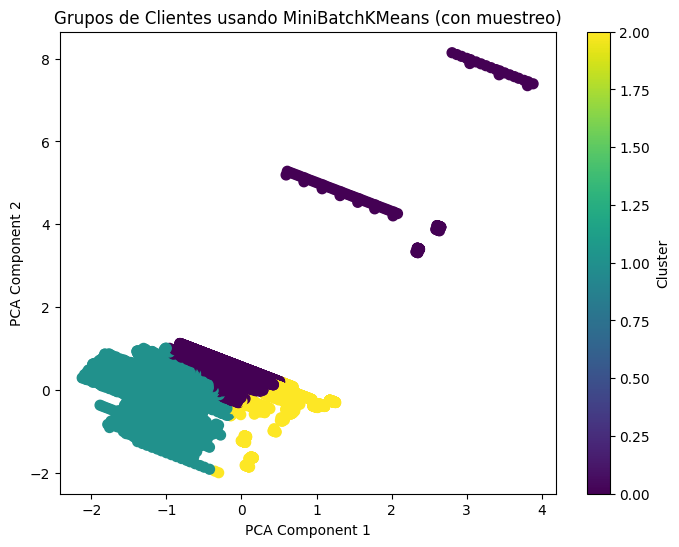

Cargas de las Variables en los Componentes Principales:
                 num__importe  num__balance  \
PCA Component 1      0.376339      0.620459   
PCA Component 2      0.831151     -0.430787   

                 cat__usuario_id_ES9520950000005132989083  \
PCA Component 1                                  0.183925   
PCA Component 2                                 -0.088438   

                 cat__usuario_id_ES9520950001995458618273  \
PCA Component 1                                 -0.310682   
PCA Component 2                                  0.240907   

                 cat__usuario_id_ES9520950004206010521940  \
PCA Component 1                                  0.194848   
PCA Component 2                                 -0.094760   

                 cat__usuario_id_ES9520950006381232285036  \
PCA Component 1                                 -0.068091   
PCA Component 2                                 -0.057709   

                 cat__usuario_id_ES9520950008876055332882  \
PCA C

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# 1. Cargar los datos
transacciones_todos_usuarios = pd.read_csv("transacciones_usuarios.csv")

# 2. Separar las columnas categóricas y numéricas
categorical_cols = transacciones_todos_usuarios.select_dtypes(include=['object']).columns
numeric_cols = transacciones_todos_usuarios.select_dtypes(include=['float64', 'int64']).columns

# 3. Preprocesamiento: One-Hot Encoding para categóricas, escalado para numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

# 4. Aplicar el preprocesamiento y transformar los datos
transacciones_preprocesadas = preprocessor.fit_transform(transacciones_todos_usuarios)

# 5. Muestreo aleatorio de los datos para reducir el tamaño (muestra de 10,000)
transacciones_muestra = transacciones_preprocesadas[:10000]

# 6. Aplicar PCA para reducir la dimensionalidad (ajustado a 2 componentes)
pca = PCA(n_components=2)
transacciones_pca_reducido = pca.fit_transform(transacciones_muestra)

# 7. Aplicar MiniBatchKMeans en lugar de K-Medoids
k = 3  # Ajusta el número de clusters si es necesario
minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
clusters = minibatch_kmeans.fit_predict(transacciones_pca_reducido)

# 8. Visualización de los clusters
plt.figure(figsize=(8,6))
plt.scatter(transacciones_pca_reducido[:, 0], transacciones_pca_reducido[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Grupos de Clientes usando MiniBatchKMeans (con muestreo)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# ------------------ Análisis de las cargas del PCA y clusters ----------------------

# Obtener los nombres de las variables
feature_names = preprocessor.get_feature_names_out()

# Obtener las cargas de los componentes principales
cargas_pca = pd.DataFrame(pca.components_, columns=feature_names, index=['PCA Component 1', 'PCA Component 2'])

# Print de las cargas para cada componente
print("Cargas de las Variables en los Componentes Principales:")
print(cargas_pca)

# Asignación de clusters para cada cliente
print("\nAsignación de clusters para cada cliente:")
print(pd.DataFrame(clusters, columns=['Cluster']))

# Imprimir la media de los valores de cada variable por cluster (para interpretar los clusters)
clientes_con_clusters = pd.DataFrame(transacciones_preprocesadas.toarray(), columns=feature_names)
clientes_con_clusters['Cluster'] = clusters
promedios_por_cluster = clientes_con_clusters.groupby('Cluster').mean()

print("\nPromedio de las características por cluster:")
print(promedios_por_cluster)


In [5]:
import pandas as pd

# Cargar los datos desde un archivo CSV (ajusta el nombre del archivo según corresponda)
transacciones_todos_usuarios = pd.read_csv("transacciones_usuarios.csv")

# Luego, continúa con el resto del código que ya te proporcioné


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (ensure this step works correctly)
# transacciones_todos_usuarios = pd.read_csv("transacciones_usuarios.csv")

# Data preparation (same as before)
usuarios_agrupados = transacciones_todos_usuarios.groupby('usuario_id').agg({
    'balance': 'mean',
    'importe': 'sum'
}).reset_index()

categorias_gasto = transacciones_todos_usuarios.pivot_table(index='usuario_id', columns='tipo', values='importe', aggfunc='sum', fill_value=0)
usuarios_agrupados = usuarios_agrupados.set_index('usuario_id').join(categorias_gasto, on='usuario_id').reset_index()
usuarios_agrupados.fillna(0, inplace=True)

# Feature selection (example using correlation)
corr_matrix = usuarios_agrupados.corr()
high_corr_features = np.abs(corr_matrix['importe']) > 0.5
selected_features = high_corr_features[high_corr_features].index.tolist()

# Preprocessing
scaler = StandardScaler()
usuarios_preprocesados = scaler.fit_transform(usuarios_agrupados[selected_features])

# Determine optimal number of clusters
silhouette_scores = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(usuarios_preprocesados)
    silhouette_scores.append(silhouette_score(usuarios_preprocesados, kmeans.labels_))

optimal_k = K[np.argmax(silhouette_scores)]

# Perform clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
usuarios_agrupados['Cluster'] = kmeans.fit_predict(usuarios_preprocesados)

# Cluster analysis
cluster_summary = usuarios_agrupados.groupby('Cluster').mean()
print("Summary of behavior for each cluster:")
print(cluster_summary)

# Visualizations
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

plt.figure(figsize=(12, 8))
sns.pairplot(usuarios_agrupados, hue='Cluster', vars=selected_features)
plt.suptitle('Pairplot of Selected Features by Cluster', y=1.02)
plt.show()

# Parallel coordinates plot
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(usuarios_agrupados, 'Cluster', cols=selected_features)
plt.title('Parallel Coordinates Plot of Clusters')
plt.show()

# Interpret clusters
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} characteristics:")
    for feature in selected_features:
        cluster_mean = usuarios_agrupados[usuarios_agrupados['Cluster'] == cluster][feature].mean()
        overall_mean = usuarios_agrupados[feature].mean()
        difference = (cluster_mean - overall_mean) / overall_mean * 100
        print(f"{feature}: {'Higher' if difference > 0 else 'Lower'} than average by {abs(difference):.2f}%")